# CV recognition

#### Requirements

In [1]:
%pip install -r requirements.txt

  Using cached wheel-0.43.0-py3-none-any.whl.metadata (2.2 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Ignored the following versions that require a different python version: 0.1.0 Requires-Python >=3.8,<3.10; 0.1.1 Requires-Python >=3.8,<3.10; 0.2.0 Requires-Python >=3.8,<3.10; 0.2.1 Requires-Python >=3.8,<3.10; 0.3.0 Requires-Python >=3.8,<3.10; 0.4.0 Requires-Python >=3.8,<3.10; 0.5.0 Requires-Python >=3.7.14,<3.11; 0.5.1 Requires-Python >=3.7.1,<3.11; 0.6.0 Requires-Python >=3.7.1,<3.11; 0.6.1 Requires-Python >=3.7.1,<3.11; 1.0.0 Requires-Python >=3.8.1,<3.11; 1.0.1 Requires-Python >=3.8.1,<3.11; 1.0.2 Requires-Python >=3.8.1,<3.11; 1.0.3 Requires-Python >=3.8.1,<3.11; 1.1.0 Requires-Python >=3.8.1,<3.11; 1.2.0 Requires-Python >=3.8.1,<3.11; 1.2.0rc0 Requires-Python >=3.8.1,<3.11; 1.2.1 Requires-Python >=3.8.1,<3.11; 1.3.0 Requires-Python >=3.8.1,<3.11; 1.4.0 Requires-Python >=3.8.1,<3.11; 1.4.0rc1 Requires-Python >=3.8.1,<3.11; 1.4.0rc2 Requires-Python >=3.8.1,<3.11; 1.4.1 Requires-Python >=3.8.1,<3.11; 1.5.0 Requires-Python <3.11,>=3.8.1; 1.5.0rc0 Requires-Python >=3.8.1,<3

#### Imports

In [3]:
import os
import pandas as pd
from kaggle.api.kaggle_api_extended import KaggleApi

## Dataset(s)

In [5]:
# Create the dataset folder if it does not exist
!mkdir -p dataset

In [6]:
# Download the dataset to the 'dataset' folder
!kaggle datasets download -d mehyarmlaweh/ner-annotated-cvs -p dataset

Dataset URL: https://www.kaggle.com/datasets/mehyarmlaweh/ner-annotated-cvs
License(s): MIT
100%|███████████████████████████████████████▉| 574M/576M [00:38<00:00, 16.5MB/s]
100%|████████████████████████████████████████| 576M/576M [00:38<00:00, 15.8MB/s]


In [7]:
# Unzip the .zip file into the 'dataset' folder
!unzip -o dataset/ner-annotated-cvs.zip -d dataset

Archive:  dataset/ner-annotated-cvs.zip
  inflating: dataset/ResumesJsonAnnotated/ResumesJsonAnnotated/cv (1)_annotated.json  
  inflating: dataset/ResumesJsonAnnotated/ResumesJsonAnnotated/cv (10)_annotated.json  
  inflating: dataset/ResumesJsonAnnotated/ResumesJsonAnnotated/cv (100)_annotated.json  
  inflating: dataset/ResumesJsonAnnotated/ResumesJsonAnnotated/cv (1000)_annotated.json  
  inflating: dataset/ResumesJsonAnnotated/ResumesJsonAnnotated/cv (1001)_annotated.json  
  inflating: dataset/ResumesJsonAnnotated/ResumesJsonAnnotated/cv (1002)_annotated.json  
  inflating: dataset/ResumesJsonAnnotated/ResumesJsonAnnotated/cv (1003)_annotated.json  
  inflating: dataset/ResumesJsonAnnotated/ResumesJsonAnnotated/cv (1004)_annotated.json  
  inflating: dataset/ResumesJsonAnnotated/ResumesJsonAnnotated/cv (1005)_annotated.json  
  inflating: dataset/ResumesJsonAnnotated/ResumesJsonAnnotated/cv (1006)_annotated.json  
  inflating: dataset/ResumesJsonAnnotated/ResumesJsonAnnotated/cv 

In [8]:
# RM the zip
!rm dataset/ner-annotated-cvs.zip

In [4]:
import os
import json
import pandas as pd

# Path to folder containing JSON files
folder_path = 'dataset/ResumesJsonAnnotated/ResumesJsonAnnotated'

# List to store extracted data
data = []
dataskill = []

# Read each JSON file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.json'):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r', encoding='utf-8') as file:
            json_data = json.load(file)
            text = json_data['text']
            annotations = json_data.get('annotations', [])
            skills = []
            for annotation in annotations:
                start, end, label = annotation
                skills.append(label.replace('SKILL: ', '').lower())
                dataskill.append({
                    'file_name': file_name,
                    'text': text,
                    'Skill': label.replace('SKILL: ', '').lower()
                })
            data.append({
                'file_name': file_name,
                'text': text,
                'Skills': skills
            })

# Convert to DataFrame
df = pd.DataFrame(data)
dfskill = pd.DataFrame(dataskill)

print(df.head())
df


                  file_name  \
0     cv (1)_annotated.json   
1    cv (10)_annotated.json   
2   cv (100)_annotated.json   
3  cv (1000)_annotated.json   
4  cv (1001)_annotated.json   

                                                text  \
0  One97 Communications Limited \nData Scientist ...   
1  Jaroslav Chechnik\nF R E S H E R\nExecutive Pr...   
2  Yogesh Chandra Pandey Mobile: +91--7017692645\...   
3  ARUN KUMAR U.C.  \n \nMob :+91 9745004628     ...   
4  ATHULIA GOPI\nKottalilThoppil (H)\nChumathra P...   

                                              Skills  
0  [building, python, java, knowledge, processing...  
1  [scikit, python, scikit learn, tensorflow, dee...  
2  [reporting, business studies, managing, maths,...  
3  [windows xp, problem solving, knowledge, arts,...  
4  [test cases, gmail, java, knowledge, asp, crit...  


,file_name,text,Skills
0,cv (1)_annotated.json,One97 Communications Limited \nData Scientist ...,"[building, python, java, knowledge, processing..."
1,cv (10)_annotated.json,Jaroslav Chechnik\nF R E S H E R\nExecutive Pr...,"[scikit, python, scikit learn, tensorflow, dee..."
2,cv (100)_annotated.json,Yogesh Chandra Pandey Mobile: +91--7017692645\...,"[reporting, business studies, managing, maths,..."
3,cv (1000)_annotated.json,ARUN KUMAR U.C. \n \nMob :+91 9745004628 ...,"[windows xp, problem solving, knowledge, arts,..."
4,cv (1001)_annotated.json,ATHULIA GOPI\nKottalilThoppil (H)\nChumathra P...,"[test cases, gmail, java, knowledge, asp, crit..."
...,...,...,...
5024,cv (995)_annotated.json,"\t\n\t\n\t\n\t\n \nDestinee Handly, Manicurist...","[sensor, music, advertising, com, video, audio..."
5025,cv (996)_annotated.json,"\t\n\t\n\t\n \nDevon Nuszer, Wardrobe Stylist...","[adam, can, advertising, nic, com, people, ray..."
5026,cv (997)_annotated.json,RESUME\nName :Gaurav Dwivedi\nAge :27 Years\nD...,"[reports, vmware, typing, knowledge, age, resu..."
5027,cv (998)_annotated.json,ResumeNitesh\nNITESH KUMAR\n Email id: niteshj...,"[inventory, gmail, knowledge, positions, relea..."


In [5]:
print(len(dfskill['Skill'].unique()))
dfskill['Skill'].unique() # number of skills

12695


array(['building', 'python', 'java', ..., 'big bang', 'iheart radio',
       'debugging skills'], dtype=object)

## Developper JS

In [6]:
df['prediction'] = 0 # Adding prediction column for label
df

,file_name,text,Skills,prediction
0,cv (1)_annotated.json,One97 Communications Limited \nData Scientist ...,"[building, python, java, knowledge, processing...",0
1,cv (10)_annotated.json,Jaroslav Chechnik\nF R E S H E R\nExecutive Pr...,"[scikit, python, scikit learn, tensorflow, dee...",0
2,cv (100)_annotated.json,Yogesh Chandra Pandey Mobile: +91--7017692645\...,"[reporting, business studies, managing, maths,...",0
3,cv (1000)_annotated.json,ARUN KUMAR U.C. \n \nMob :+91 9745004628 ...,"[windows xp, problem solving, knowledge, arts,...",0
4,cv (1001)_annotated.json,ATHULIA GOPI\nKottalilThoppil (H)\nChumathra P...,"[test cases, gmail, java, knowledge, asp, crit...",0
...,...,...,...,...
5024,cv (995)_annotated.json,"\t\n\t\n\t\n\t\n \nDestinee Handly, Manicurist...","[sensor, music, advertising, com, video, audio...",0
5025,cv (996)_annotated.json,"\t\n\t\n\t\n \nDevon Nuszer, Wardrobe Stylist...","[adam, can, advertising, nic, com, people, ray...",0
5026,cv (997)_annotated.json,RESUME\nName :Gaurav Dwivedi\nAge :27 Years\nD...,"[reports, vmware, typing, knowledge, age, resu...",0
5027,cv (998)_annotated.json,ResumeNitesh\nNITESH KUMAR\n Email id: niteshj...,"[inventory, gmail, knowledge, positions, relea...",0


In [7]:
df_filtered = dfskill[dfskill['Skill'].str.contains(r'(js|javascript|java script)', case=False, na=False)]
df_filtered = df[df['file_name'].isin(df_filtered['file_name'])]
df['prediction'] = df['file_name'].isin(df_filtered['file_name']).astype(int) # Set prediction to 1 for file_names with javascript

test = df[df['prediction'] == 1]
print(len(test))
for skill in test['Skills']: # Show Interesting Resume Skills
    print(skill)

C:\Users\camil\AppData\Local\Temp\ipykernel_17016\961083093.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_filtered = dfskill[dfskill['Skill'].str.contains(r'(js|javascript|java script)', case=False, na=False)]


127
['reports', 'cell phone', 'inventory', 'passion', 'ability', 'wap', 'gmail', 'knowledge', 'components', 'flexible', 'technology', 'dhcp', 'hardware and software', 'hardware maintenance', 'curriculum vitae', 'technical support', 'mean', 'assembling', 'schedules', 'studies', 'skills', 'technical background', 'time', 'installation', 'lan/wan', 'network', 'company', 'high school', 'information technology', 'ip telephony', 'field work', 'leading', 'mobile', 'networks', 'computers', 'report', 'strong technical background', 'router configuration', 'repair', 'c', 'linux system administration', 'assembly', 'enthusiastic', 'networking', 'voice', 'education', 'management', 'active directory', 'routine maintenance', 'opportunities', 'system administration', 'php', 'responding', 'access', 'windows server', 'rstp', 'it skills', 'personal computers', 'issues', 'box', 'configure', 'work experience', 'pc', 'cisco switches', 'inventory management', 'network security', 'team', 'voip', 'ip', 'lan netw

In [8]:
df

,file_name,text,Skills,prediction
0,cv (1)_annotated.json,One97 Communications Limited \nData Scientist ...,"[building, python, java, knowledge, processing...",0
1,cv (10)_annotated.json,Jaroslav Chechnik\nF R E S H E R\nExecutive Pr...,"[scikit, python, scikit learn, tensorflow, dee...",0
2,cv (100)_annotated.json,Yogesh Chandra Pandey Mobile: +91--7017692645\...,"[reporting, business studies, managing, maths,...",0
3,cv (1000)_annotated.json,ARUN KUMAR U.C. \n \nMob :+91 9745004628 ...,"[windows xp, problem solving, knowledge, arts,...",0
4,cv (1001)_annotated.json,ATHULIA GOPI\nKottalilThoppil (H)\nChumathra P...,"[test cases, gmail, java, knowledge, asp, crit...",0
...,...,...,...,...
5024,cv (995)_annotated.json,"\t\n\t\n\t\n\t\n \nDestinee Handly, Manicurist...","[sensor, music, advertising, com, video, audio...",0
5025,cv (996)_annotated.json,"\t\n\t\n\t\n \nDevon Nuszer, Wardrobe Stylist...","[adam, can, advertising, nic, com, people, ray...",0
5026,cv (997)_annotated.json,RESUME\nName :Gaurav Dwivedi\nAge :27 Years\nD...,"[reports, vmware, typing, knowledge, age, resu...",0
5027,cv (998)_annotated.json,ResumeNitesh\nNITESH KUMAR\n Email id: niteshj...,"[inventory, gmail, knowledge, positions, relea...",0


In [9]:
one = df[df['prediction'] == 1]
zero = df[df['prediction'] == 0]
zero = zero.sample(n=len(one), random_state=42)
dfModel = pd.concat([one, zero])
dfModel = dfModel.sample(frac=1, random_state=42).reset_index(drop=True) # Smaller dataset for better ratio between prediction = 0 or 1
dfModel

,file_name,text,Skills,prediction
0,cv (4670)_annotated.json,STOREKEEPER II\nProfessional Summary\nThe purp...,"[reports, building, inventory, word processing...",0
1,cv (1095)_annotated.json,Terry Kuny \n CURRICULUM VITÆ \n 240 Fairmon...,"[challenge, searching, building, technical lea...",1
2,cv (4446)_annotated.json,Pavithra Shetty\nSummary\nCustomer-oriented Pr...,"[bi, reports, building, reporting, python, jav...",1
3,cv (3767)_annotated.json,CURRICULUM VITAE \nSOHAIL AKHTAR\nContact Det...,"[gmail, knowledge, code, technical skill, curr...",0
4,cv (819)_annotated.json,"SARATH KS\nMale, Age – 24 years\nT...","[reports, ability, debugging, java, knowledge,...",1
...,...,...,...,...
249,cv (4989)_annotated.json,CASH FLORES\nPROFILE\nMachine learning Enthusi...,"[python, java, datasets, matplotlib, data scie...",1
250,cv (1398)_annotated.json,NADUKKARA HOUSE \n ...,"[reports, matlab, gmail, knowledge, arts, age,...",1
251,cv (4728)_annotated.json,SR. CONSULTANT\nProfessional Summary\nA dedica...,"[reports, reporting, subject matter, ability, ...",1
252,cv (3545)_annotated.json,...,"[building, gmail, knowledge, age, performance,...",0


In [10]:
dfModel = dfskill[dfskill['file_name'].isin(dfModel['file_name'])]
print(len(dfModel['Skill'].unique()))
print(dfModel['Skill'].unique())
dfModel = dfModel.merge(df[['file_name', 'prediction']], on='file_name', how='left') # We separate the skills
dfModel

4927
['self service' 'forbes' 'color' ... 'iphone' 'parallel processing' 'ipad']


,file_name,text,Skill,prediction
0,cv (1005)_annotated.json,"\n \n \n \nBethany Newell, Manicurist \nwww.c...",self service,0
1,cv (1005)_annotated.json,"\n \n \n \nBethany Newell, Manicurist \nwww.c...",forbes,0
2,cv (1005)_annotated.json,"\n \n \n \nBethany Newell, Manicurist \nwww.c...",color,0
3,cv (1005)_annotated.json,"\n \n \n \nBethany Newell, Manicurist \nwww.c...",brand,0
4,cv (1005)_annotated.json,"\n \n \n \nBethany Newell, Manicurist \nwww.c...",italian,0
...,...,...,...,...
31103,cv (999)_annotated.json,iOS Developer\nPradeep R\nRoopena Agarahara...,phones,1
31104,cv (999)_annotated.json,iOS Developer\nPradeep R\nRoopena Agarahara...,services,1
31105,cv (999)_annotated.json,iOS Developer\nPradeep R\nRoopena Agarahara...,smart,1
31106,cv (999)_annotated.json,iOS Developer\nPradeep R\nRoopena Agarahara...,systems,1


In [11]:
if 'text' in dfModel.columns:
    dfModel = dfModel.drop(columns=['text'])

df_pivot = dfModel.pivot_table(index='file_name', columns='Skill', aggfunc='size', fill_value=0).astype(bool)
df_pivot = df_pivot.rename(columns={'prediction': 'prediction_bool'})


df_prediction = dfModel[['file_name', 'prediction']].drop_duplicates().set_index('file_name')
dfModel = df_pivot.join(df_prediction)

dfModel = dfModel.reset_index()
dfModel
# We reverse our dataframe where each column is a skill

,file_name,.net,.net technologies,10 years experience,10 years of experience,15 years of experience,15+ years of experience,2 years experience,2 years of experience,20+ years of experience,...,xml,xml messages,xp,xpath,xquery,xsd,xslt,zend,zeta,prediction
0,cv (1005)_annotated.json,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
1,cv (1019)_annotated.json,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
2,cv (1021)_annotated.json,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
3,cv (1022)_annotated.json,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,1
4,cv (103)_annotated.json,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,cv (903)_annotated.json,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
245,cv (911)_annotated.json,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
246,cv (934)_annotated.json,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,1
247,cv (935)_annotated.json,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,1


In [12]:
len(dfModel[dfModel['prediction'] == 1]) # We find our 127 CV prediction = 1

127

In [13]:
from sklearn.model_selection import train_test_split

dfModel = dfModel.drop('file_name', axis=1)
X = dfModel.drop('prediction', axis=1)
y = dfModel['prediction']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42) # Separate into training game and validation game

print(f'Training size : {X_train.shape[0]}')
print(f'Validation size : {X_val.shape[0]}')


Training size : 199
Validation size : 50


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)[:, 1]

accuracy = accuracy_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)
classification_rep = classification_report(y_val, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')
print('Classification Report:')
print(classification_rep) # We apply RandomForest on it

Accuracy: 0.9400
ROC AUC Score: 0.9816
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        24
           1       0.93      0.96      0.94        26

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50



                    Model  Accuracy
0           Random Forest      0.94
1       Gradient Boosting      0.98
2     Logistic Regression      0.90
3  Support Vector Machine      0.94
4     K-Nearest Neighbors      0.62
5           Decision Tree      0.94
6             Naive Bayes      0.88
7              Linear SVC      0.92
8      XGBoost Classifier      0.94
Model: Random Forest
Accuracy: 0.9400
ROC AUC Score: 0.9815705128205128
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        24
           1       0.93      0.96      0.94        26

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50

------------------------------------------------------------
Model: Gradient Boosting
Accuracy: 0.9800
ROC AUC Score: 0.9983974358974358
Classification Report:
              precision    recall  f1-score   support

   

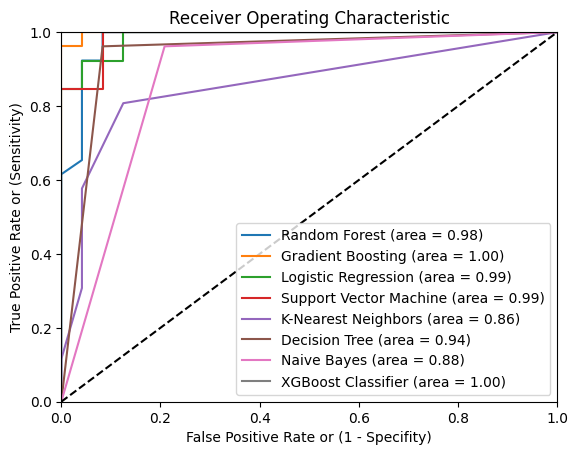

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import time
from sklearn.metrics import roc_curve, auc

# List of models to compare
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42), # Concrete ML compatible
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42), # Concrete ML compatible
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(), # Concrete ML compatible
    "Decision Tree": DecisionTreeClassifier(random_state=42), # Concrete ML compatible
    "Naive Bayes": GaussianNB(),
    "Linear SVC": LinearSVC(random_state=42, max_iter=10000), # Concrete ML compatible
    "XGBoost Classifier": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss') # Concrete ML compatible
}

# stock results
results = []

# Training and Validation
for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    y_pred = model.predict(X_val)
    y_pred_proba = model.predict_proba(X_val)[:, 1] if hasattr(model, "predict_proba") else None
    
    accuracy = accuracy_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred_proba) if y_pred_proba is not None else 'N/A'
    classification_rep = classification_report(y_val, y_pred)
    
    # Stock results
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "ROC AUC": roc_auc,
        "Classification Report": classification_rep,
        "Execution time (sec)": training_time
    })

    # ROC curve
    if y_pred_proba is not None:
        fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
        plt.plot(fpr, tpr, label=f'{model_name} (area = {roc_auc:.2f})')

# DF pandas
results_df = pd.DataFrame(results)

# Accuracies
print(results_df[["Model", "Accuracy"]])

# Results
for index, row in results_df.iterrows():
    print(f'Model: {row["Model"]}')
    print(f'Accuracy: {row["Accuracy"]:.4f}')
    print(f'ROC AUC Score: {row["ROC AUC"]}')
    print('Classification Report:')
    print(row["Classification Report"])
    print('-' * 60)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [20]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

print(f"Best parameters: {best_params}")

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [21]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

svc = SVC(random_state=42)

grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

print(f"Best parameters: {best_params}")

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


In [22]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11]
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

print(f"Best parameters: {best_params}")

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters: {'n_neighbors': 5}


### With concret ML

In [ ]:
import pandas as pd
from concrete.ml.sklearn.rf import RandomForestClassifier
from concrete.ml.sklearn.linear_model import LogisticRegression
from concrete.ml.sklearn.svm import LinearSVC
from concrete.ml.sklearn.neighbors import KNeighborsClassifier
from concrete.ml.sklearn.tree import DecisionTreeClassifier
from concrete.ml.sklearn.xgb import XGBClassifier
from sklearn.preprocessing import StandardScaler
import time

# Data normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

if 'FHE Accuracy' not in results_df.columns: # Adds FHE Accuracy column
    results_df['FHE Accuracy'] = None

if 'FHE Execution time (sec)' not in results_df.columns: # Adds FHE Accuracy column
    results_df['FHE Execution time (sec)'] = None

# List of models to compare
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42), # Concrete ML
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42), # Concrete ML
    "K-Nearest Neighbors": KNeighborsClassifier(), # Concrete ML
    "Decision Tree": DecisionTreeClassifier(random_state=42), # Concrete ML
    "Linear SVC": LinearSVC(random_state=42, max_iter=10000), # Concrete ML
    "XGBoost Classifier": XGBClassifier(random_state=42, use_label_encoder=False) # Concrete ML # , eval_metric='logloss'
}

# Training and Validation
for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    y_pred = model.predict(X_val)
    if hasattr(model, "predict_proba") and model_name != "K-Nearest Neighbors":
        y_pred_proba = model.predict_proba(X_val)[:, 1]
    
    accuracy = accuracy_score(y_val, y_pred)
    
    # Stock result
    results_df.loc[results_df['Model'] == model_name, 'FHE Accuracy'] = accuracy
    results_df.loc[results_df['Model'] == model_name, 'FHE Execution time (sec)'] = training_time

# Results
results_df[['Model','Accuracy','Execution time (sec)','FHE Accuracy','FHE Execution time (sec)']]

In [ ]:
plt.figure(figsize=(10, 8))

# Plot ROC Curve for each FHE model
for model_name, model in models.items():
    if hasattr(model, "predict_proba") and model_name != "K-Nearest Neighbors":
        y_pred_proba = model.predict_proba(X_val)[:, 1]
        
        # Calculate ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        
        # Plot
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot no-skill classifier
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')

# Customize the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for FHE Methods')
plt.legend(loc="lower right")
plt.show()

## Modele Lineaire 

#### Architecture

#### Training

#### Test

## Decision Tree

#### Architecture

#### Training

#### Test